Dataset Shape: (10129, 19)

Data Types:
 Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

Missing Values:
 Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Soun

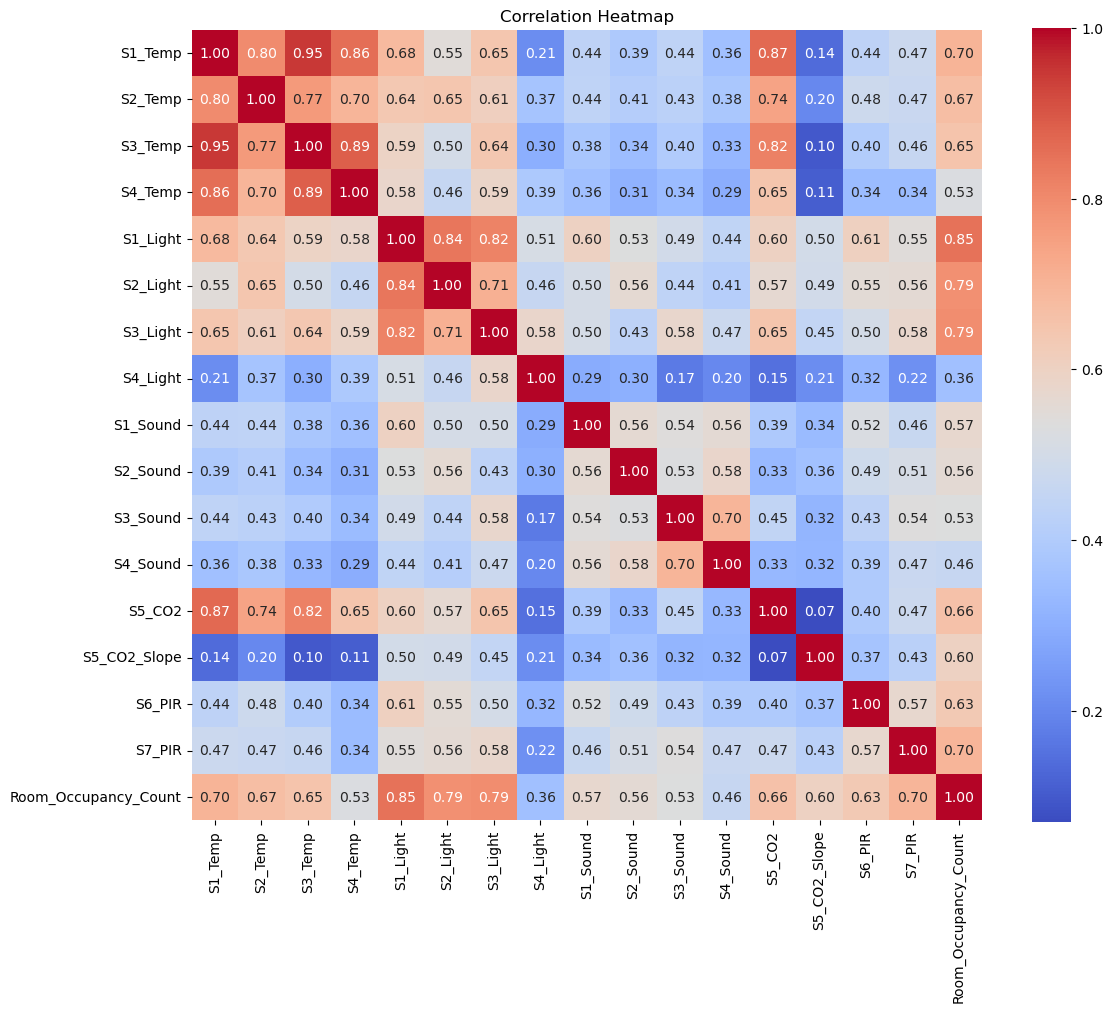

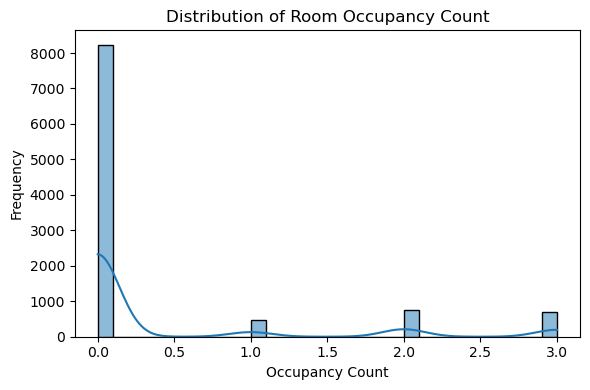

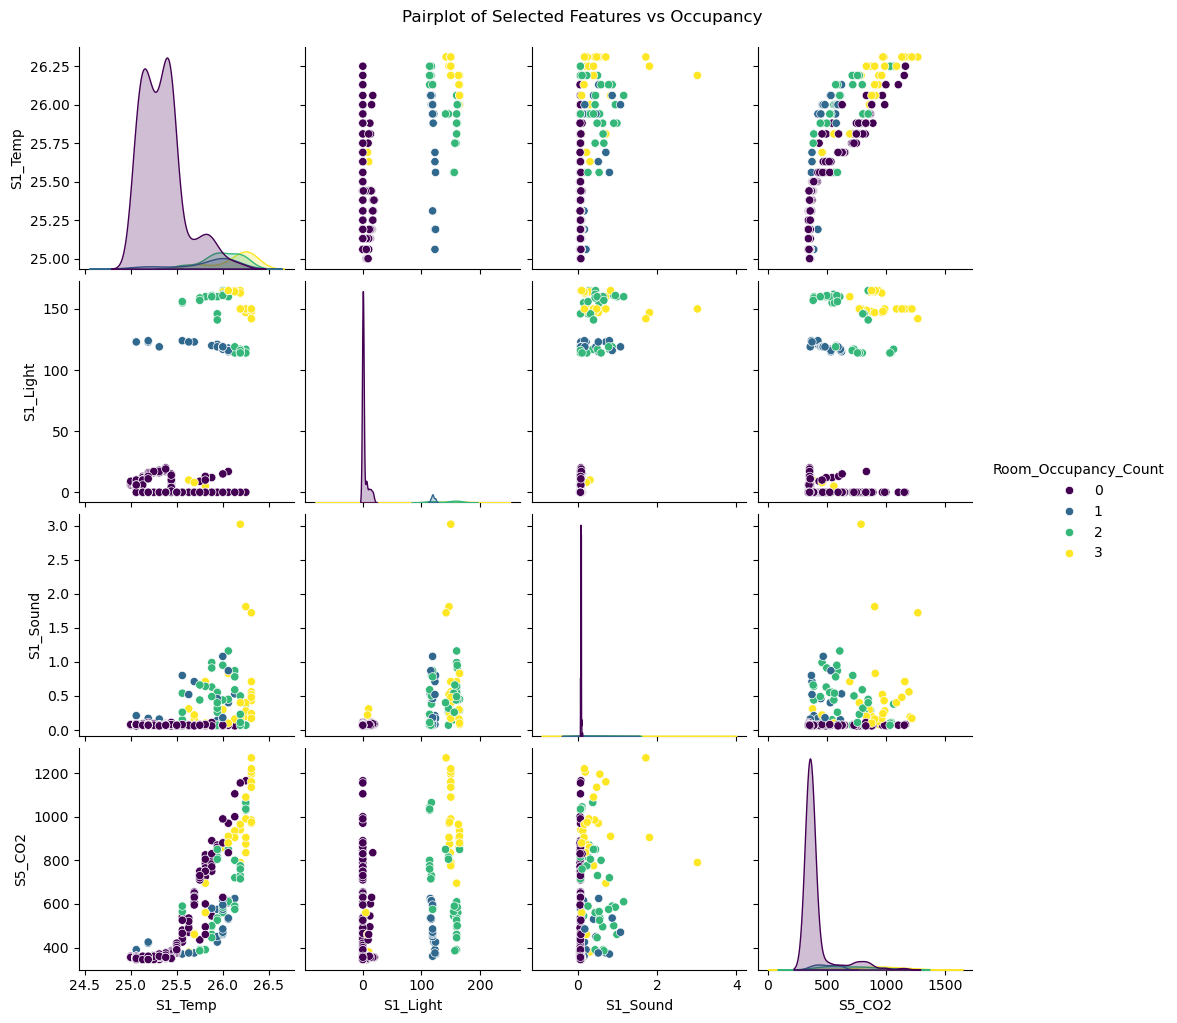

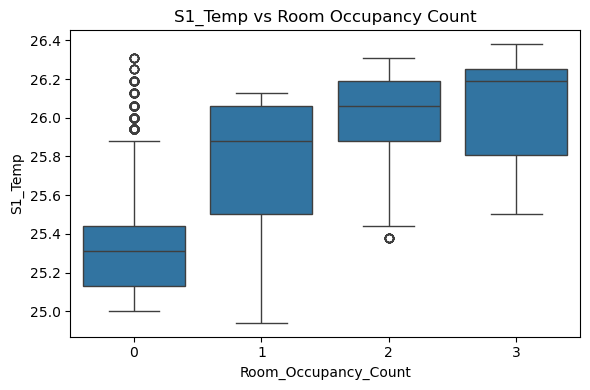

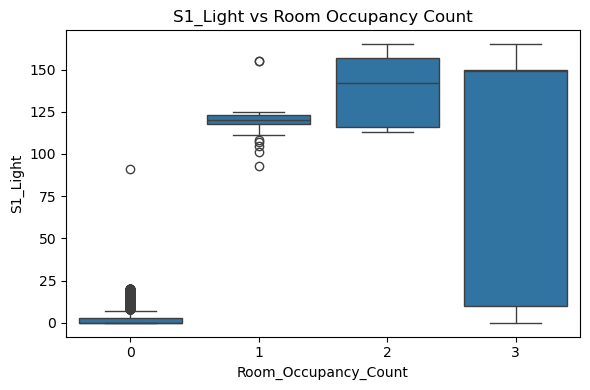

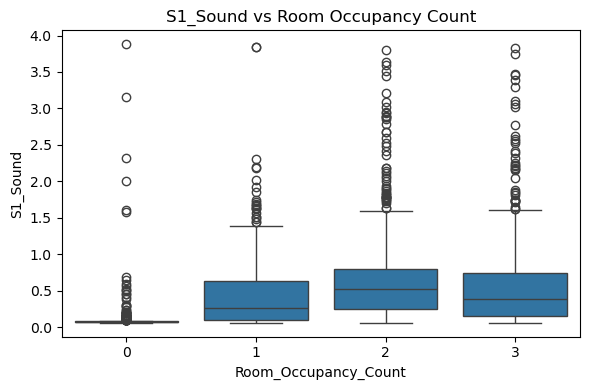

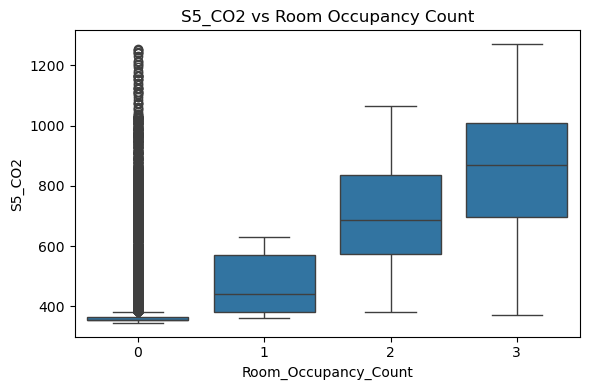

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Occupancy_Estimation.csv")

# 1. Dataset Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df["Room_Occupancy_Count"], bins=30, kde=True)
plt.title("Distribution of Room Occupancy Count")
plt.xlabel("Occupancy Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Pairplot (subset for performance)
sample_df = df.sample(500)  # sample to reduce plot load
sns.pairplot(sample_df[['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2', 'Room_Occupancy_Count']],
             hue='Room_Occupancy_Count', palette='viridis')
plt.suptitle("Pairplot of Selected Features vs Occupancy", y=1.02)
plt.show()

# 5. Boxplots for Sensor Readings vs Occupancy
features = ['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Room_Occupancy_Count', y=feature, data=df)
    plt.title(f"{feature} vs Room Occupancy Count")
    plt.tight_layout()
    plt.show()

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Keep only numeric columns for outlier detection
df_numeric = df.select_dtypes(include='number')


In [7]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df_numeric))

# Threshold: z > 3 is often considered an outlier
outliers_z = (z_scores > 3)

# Count of outliers per column
print("Z-score Outlier Counts:")
print(pd.DataFrame(outliers_z, columns=df_numeric.columns).sum())


Z-score Outlier Counts:
S1_Temp                   0
S2_Temp                 241
S3_Temp                   0
S4_Temp                   0
S1_Light                  0
S2_Light                837
S3_Light                155
S4_Light                 29
S1_Sound                229
S2_Sound                187
S3_Sound                246
S4_Sound                201
S5_CO2                  176
S5_CO2_Slope            211
S6_PIR                  913
S7_PIR                  806
Room_Occupancy_Count      0
dtype: int64


In [9]:
# Calculate IQR for each column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

print("\nIQR Outlier Counts:")
print(outliers_iqr.sum())



IQR Outlier Counts:
S1_Temp                  162
S2_Temp                  948
S3_Temp                    0
S4_Temp                    0
S1_Light                1716
S2_Light                1017
S3_Light                 950
S4_Light                 543
S1_Sound                1772
S2_Sound                1703
S3_Sound                1671
S4_Sound                 721
S5_CO2                  1657
S5_CO2_Slope            4033
S6_PIR                   913
S7_PIR                   806
Room_Occupancy_Count    1901
dtype: int64


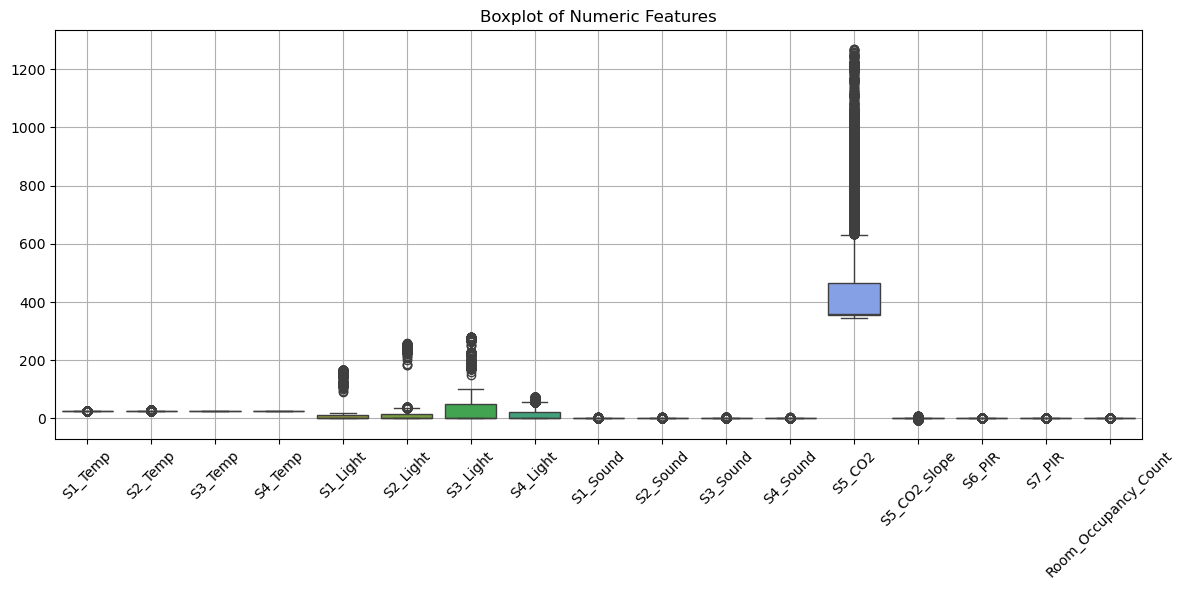

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Numeric Columns:
 ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']

Missing values:
 S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

Z-Score Outlier Counts:
 S1_Temp                   0
S2_Temp                 241
S3_Temp                   0
S4_Temp                   0
S1_Light                  0
S2_Light                837
S3_Light                155
S4_Light                 29
S1_Sound                229
S2_Sound            

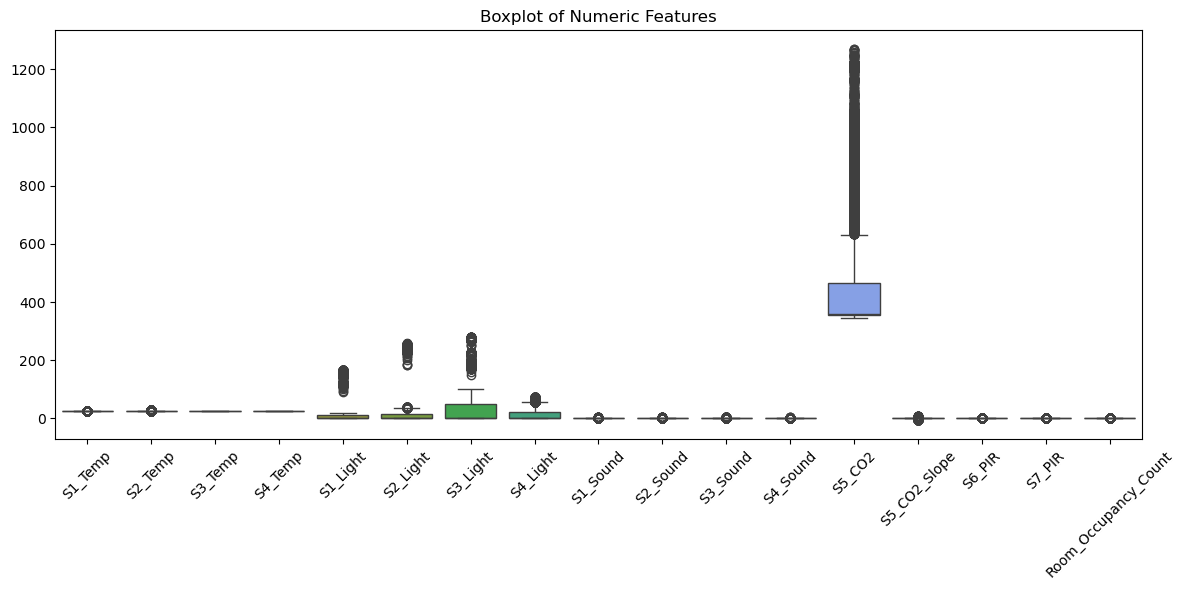

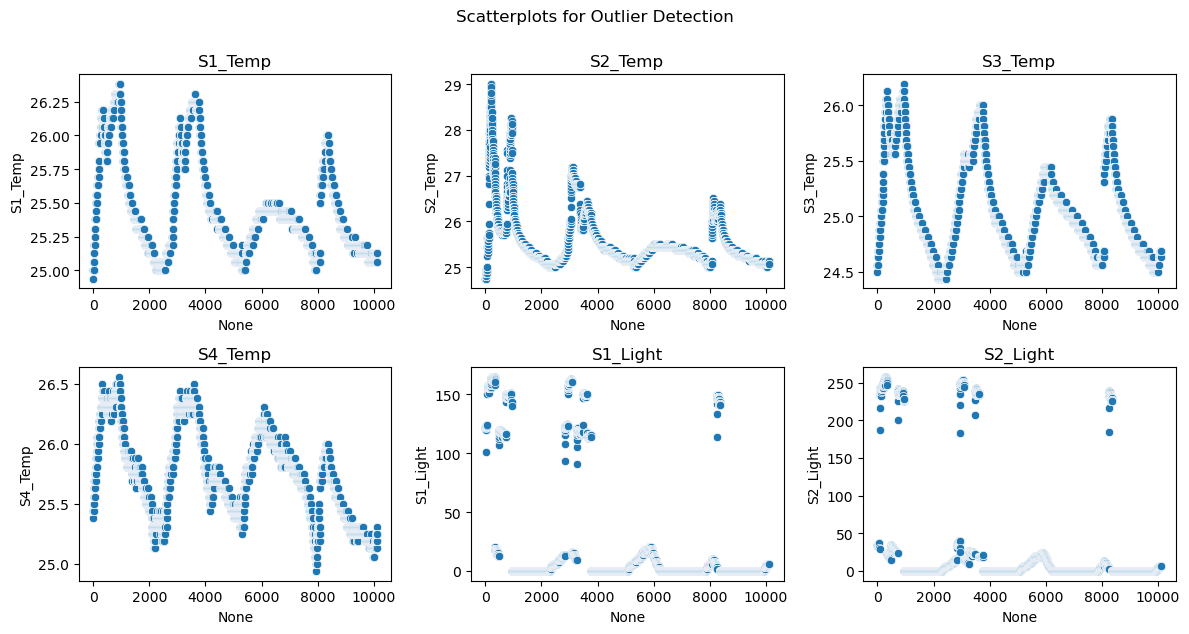

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load data
df = pd.read_csv("Occupancy_Estimation.CSV")

# Drop Date and Time columns if they exist
df = df.drop(columns=['Date', 'Time'], errors='ignore')

# Keep only numeric columns
df = df.select_dtypes(include='number')

print("Numeric Columns:\n", df.columns.tolist())

# Check for NaN values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with NaNs (optional safety)
df = df.dropna()

try:
    # Z-Score method
    z_scores = np.abs(zscore(df))
    outliers_z = (z_scores > 3)
    print("\nZ-Score Outlier Counts:\n", outliers_z.sum())
  # IQR method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    print("\nIQR Outlier Counts:\n", outliers_iqr.sum())

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df)
    plt.title("Boxplot of Numeric Features")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Scatterplots
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(df.columns[:6]):  # plot up to 6 features
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=df.index, y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.suptitle("Scatterplots for Outlier Detection", y=1.05)
    plt.show()

except ValueError as ve:
    print("\n❌ ValueError encountered:")
    print(ve)


=== Regression Model Comparison ===
                        MAE      RMSE        R²
Model                                          
Linear Regression  0.163680  0.303376  0.887775
Ridge Regression   0.163595  0.303384  0.887769
Lasso Regression   0.655253  0.905998 -0.000879
Decision Tree      0.008885  0.143981  0.974722
Random Forest      0.011910  0.124102  0.981220
KNN Regressor      0.017769  0.137385  0.976985
SVR                0.062363  0.145087  0.974332


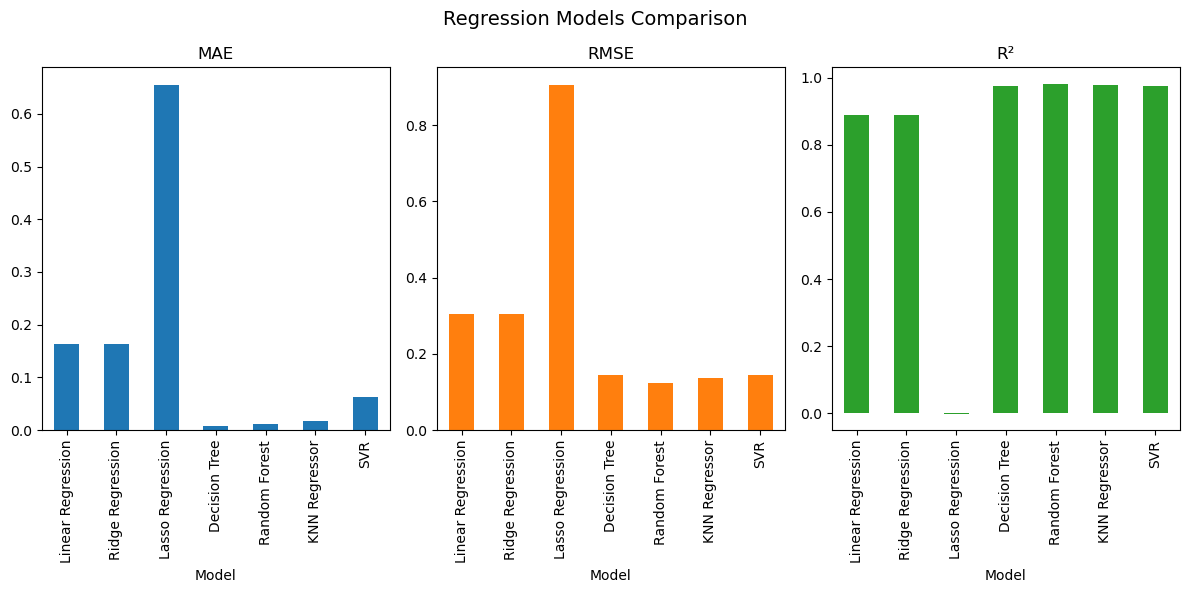

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Feature matrix and regression target
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = df['Room_Occupancy_Count']  # Regression target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define regression models in pipelines
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge())
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso())
    ]),
    "Decision Tree": Pipeline([
        ("model", DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "KNN Regressor": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=5))
    ]),
    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR())
    ])
}

# Store evaluation results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

# Display results in a table
results_df = pd.DataFrame(results).set_index("Model")
print("\n=== Regression Model Comparison ===")
print(results_df)

# Plot comparison
results_df.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(1, 3), legend=False)
plt.suptitle("Regression Models Comparison", fontsize=14)
plt.tight_layout()
plt.show()


Accuracy: 0.9955577492596249
Precision: 0.9901477832512315
Recall: 0.9877149877149877
F1 Score: 0.988929889298893


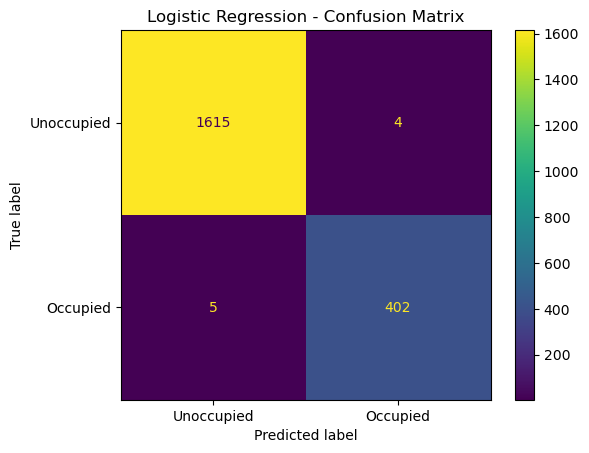

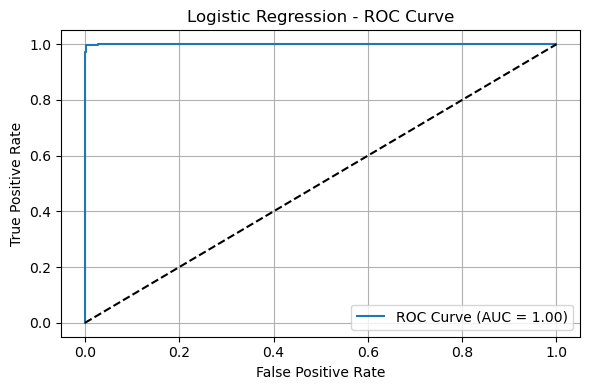

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Prepare features (X) and binary target (y)
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)  # Convert to binary

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC curve

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Unoccupied", "Occupied"])
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


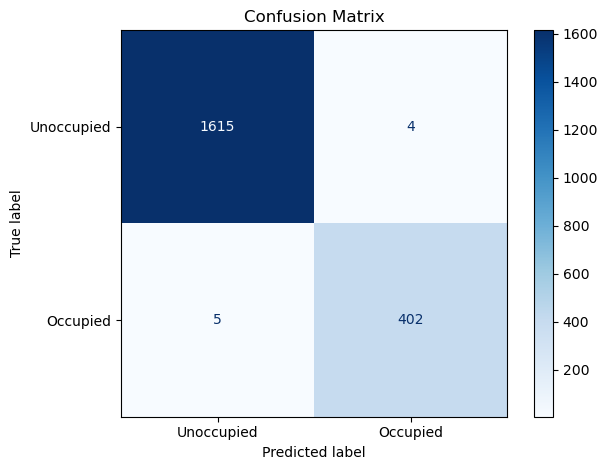

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume y_test and y_pred already exist (true labels and predicted labels)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unoccupied", "Occupied"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()



=== K-Nearest Neighbors ===
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


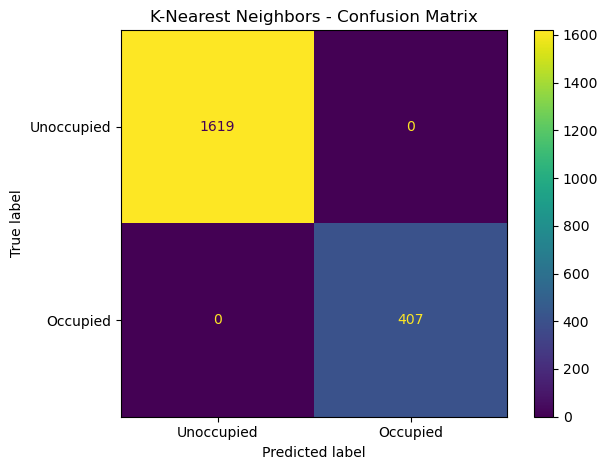


=== Decision Tree ===
Accuracy : 0.9985192497532083
Precision: 1.0
Recall   : 0.9926289926289926
F1 Score : 0.9963008631319359


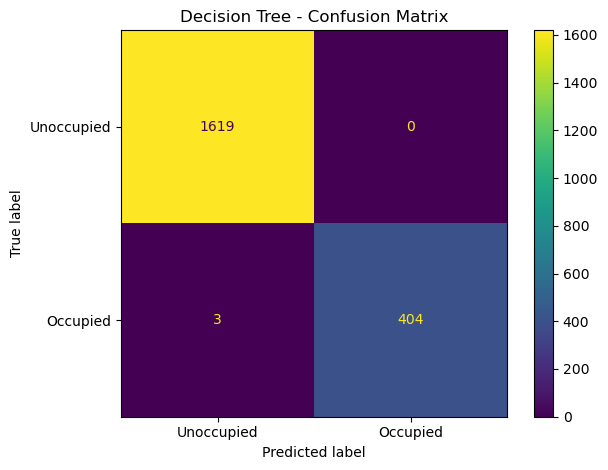

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("Occupancy_Estimation.CSV")
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)  # Binary target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# --- Decision Tree Classifier ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Unoccupied", "Occupied"])
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Evaluate both models
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Decision Tree", y_test, y_pred_dt)


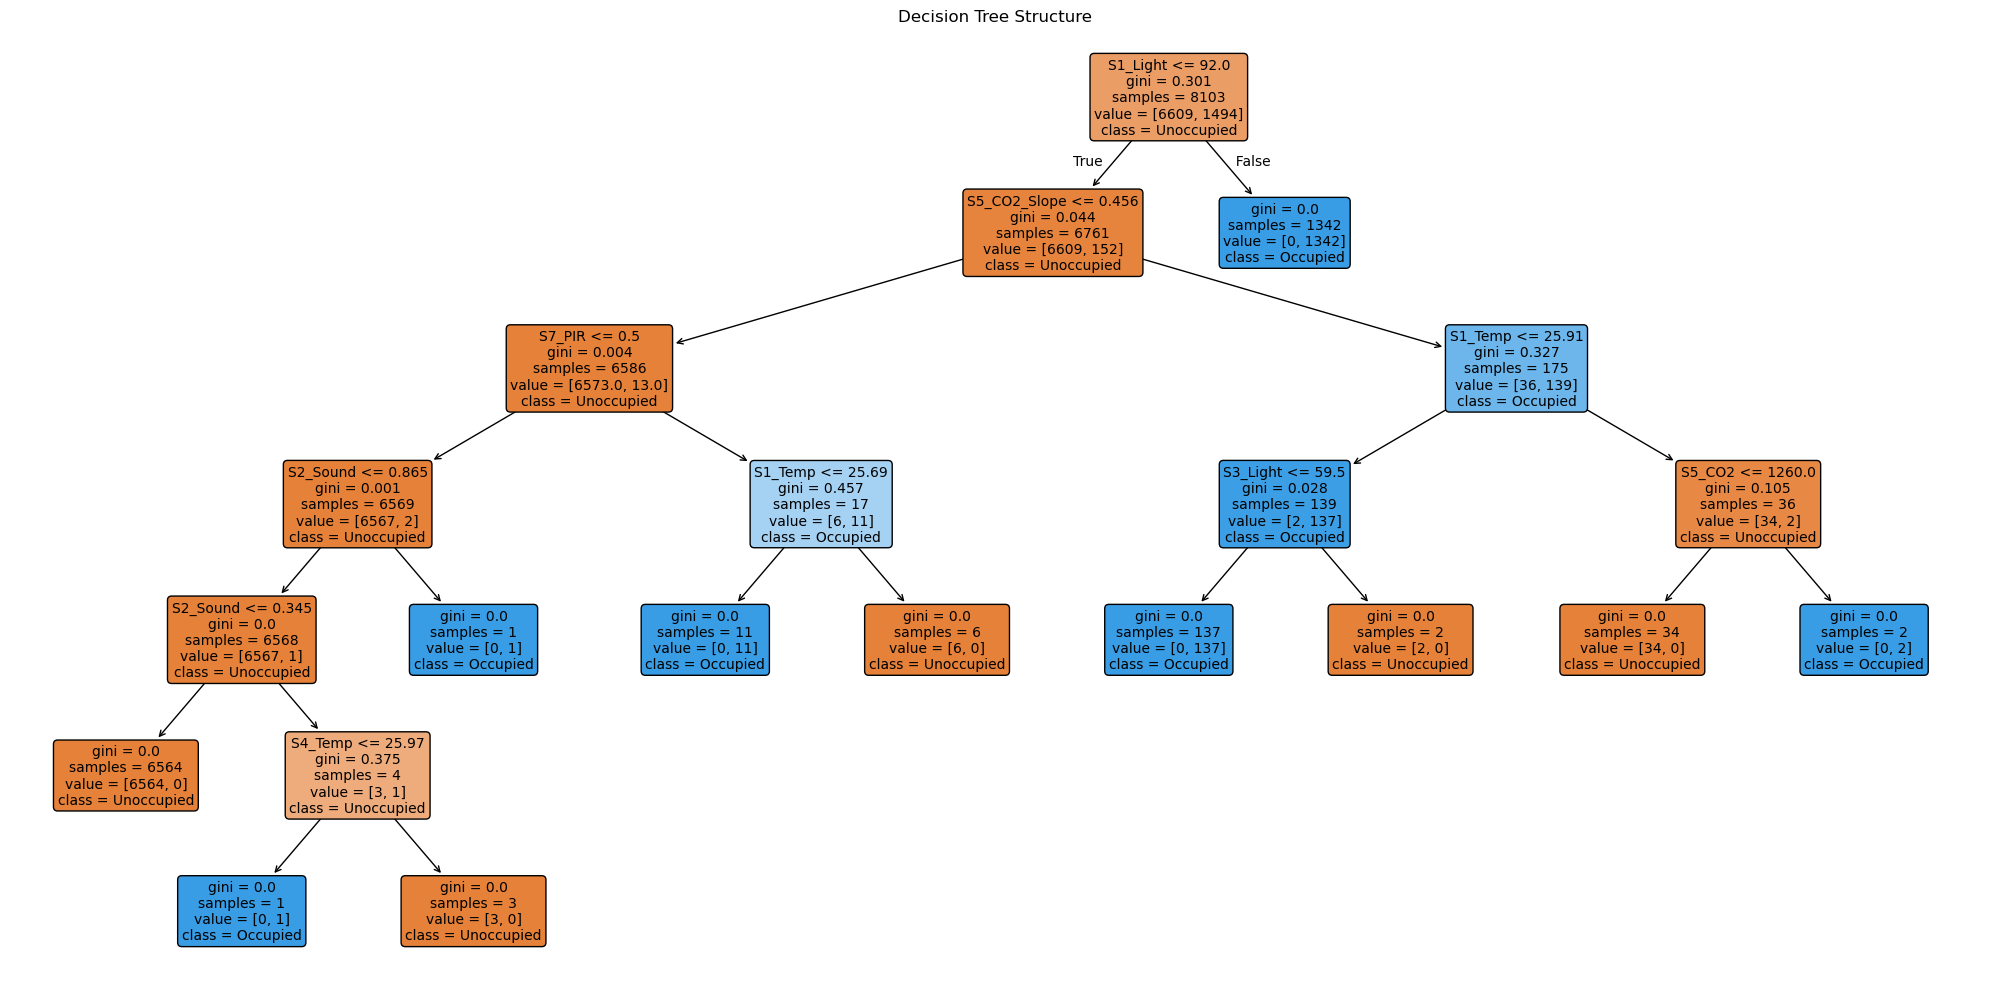

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you already trained a Decision Tree model:
# dt = DecisionTreeClassifier(...)
# dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Unoccupied", "Occupied"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.tight_layout()
plt.show()


=== Random Forest Classifier ===
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


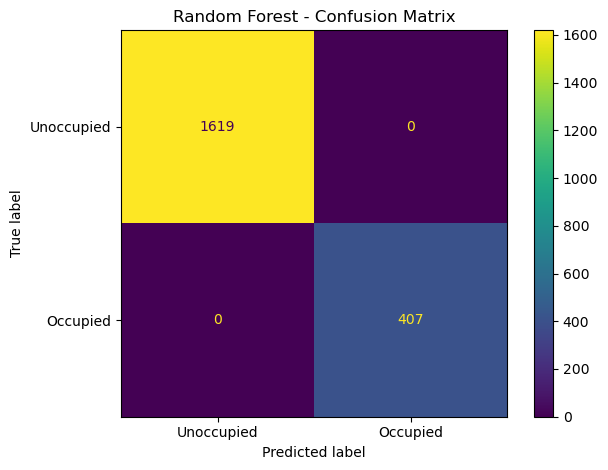

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Prepare features and target
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)  # Binary classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("=== Random Forest Classifier ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Unoccupied", "Occupied"])
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load and prepare data
df = pd.read_csv("Occupancy_Estimation.CSV")
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


=== Support Vector Classifier ===
Accuracy : 0.998025666337611
Precision: 0.9926650366748166
Recall   : 0.9975429975429976
F1 Score : 0.9950980392156863


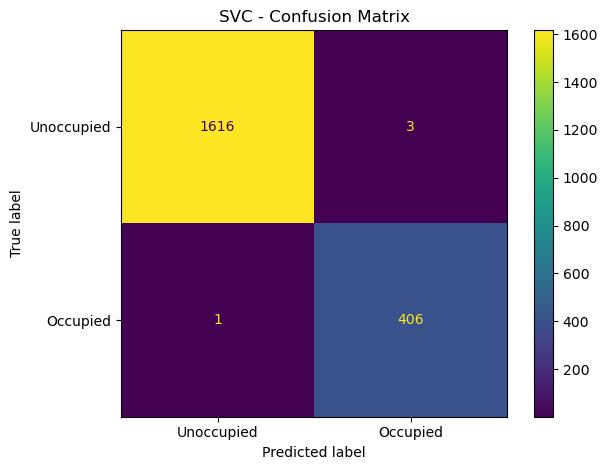

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Occupancy_Estimation.CSV")

# Features and binary target
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create pipeline with scaling + SVC
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train the model
svc_pipeline.fit(X_train, y_train)

# Predict
y_pred = svc_pipeline.predict(X_test)

# Evaluate
print("=== Support Vector Classifier ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Unoccupied", "Occupied"])
plt.title("SVC - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()



=== Model Comparison ===
                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.997038   0.995062  0.990172  0.992611
KNN                  0.997532   0.990244  0.997543  0.993880
Decision Tree        0.998519   1.000000  0.992629  0.996301
Random Forest        1.000000   1.000000  1.000000  1.000000
SVC                  0.998026   0.992665  0.997543  0.995098


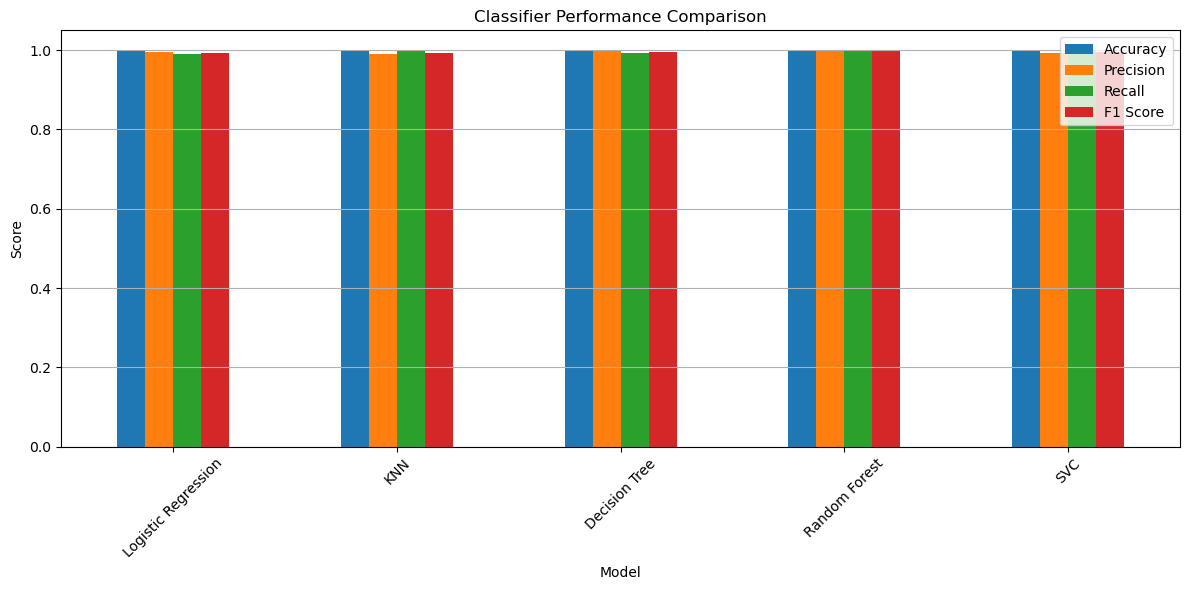

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and prepare data
df = pd.read_csv("Occupancy_Estimation.CSV")
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
y = (df['Room_Occupancy_Count'] > 0).astype(int)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models in pipelines (scaling included)
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "Decision Tree": Pipeline([
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "SVC": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel='rbf', probability=True, random_state=42))
    ])
}

# Evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index("Model")

# Print metrics
print("\n=== Model Comparison ===")
print(results_df)

# Bar plot of comparison
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
